# A4 Sounds and Spectra

## Harmonics

### Description
Harmonics are combinations of frequenies that is an integer multiple of a fundamental frequency.

$$
f_n = n f_n
$$

and they increment like the first harmonic to second harmonic in a linear pattern.

$$
f_2 = 2f_1
$$

Harmonics arise from modes of vibration of a physical objects or resonant acvities. 

`Pure Tone`~ A sound composed of a single frequency.

### Equation
$$
x(t) = \sum_{k=1}^N a_k * cos(2 \pi k f_1 t + \phi _k) 
$$

- t being the time vector
- a being the amplitude
- f1 being the fundamental harmonic
- phi being the phase
- k being the kth harmonic


In [1]:
from A4_rhl72 import *
import numpy as np
import matplotlib.pyplot as plt

## 1a harmonics()  

In [2]:
def harmonic(t, f1=1, alist=1, philist=0):
    """
    generate a harmonic wave
    
    t ~ Time of a Harmonic Function 
    f1 ~ Fundamental Frequncy (hz)
    alist ~ Values specify the amplitudes of each harmonic starting with the fundament
    philist ~ Phase shifts (radians)
    use cosine
    """

    alist = np.atleast_1d(alist)
    phaselist = np.atleast_1d(philist)

    # Match lengths
    if phaselist.size == 1:
        phaselist = np.full_like(alist, phaselist)

    # Sum the cosine components
    waveform = sum(
        a * np.cos(2 * np.pi * (i + 1) * f1 * t + phi)
        for i, (a, phi) in enumerate(zip(alist, phaselist))
    )
    
    return waveform

1a demo

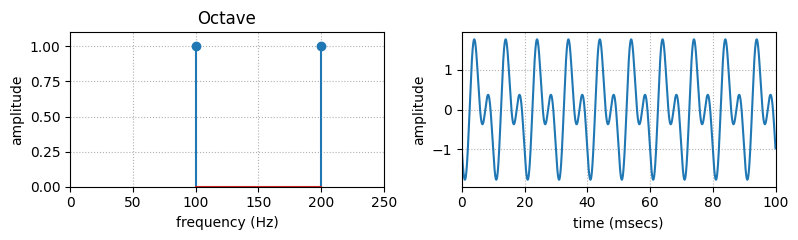

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
fs = 44100          # Sampling rate
duration = 0.1      # 100 milliseconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Frequencies and amplitudes
f1 = 100
f2 = 200
alist = [1.0, 1.0]
frequencies = [f1, f2]

philist = [0, -np.pi / 2]  # phase shift second harmonic to sine wave
wave = alist[0] * np.cos(2 * np.pi * f1 * t + philist[0]) + alist[1] * np.cos(2 * np.pi * f2 * t + philist[1])

wave = -wave

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))

# Frequency domain (stem plot)
axs[0].stem(frequencies, alist)
axs[0].set_title("Octave")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("amplitude")
axs[0].set_xlim(0, 250)
axs[0].set_ylim(0, 1.1)
axs[0].grid(True, linestyle=":")

# Time domain waveform
axs[1].plot(t * 1000, wave)
axs[1].set_xlabel("time (msecs)")
axs[1].set_ylabel("amplitude")
axs[1].set_xlim(0, 100)
axs[1].grid(True, linestyle=":")

plt.tight_layout()
plt.show()



cosines()

In [4]:
def cosines(t, flist=1, alist=1, philist=0):
    """
    Generate a sum of cosine waves with arbitrary frequencies.
    
    Parameters:
    - t: time array
    - flist: list of frequencies (Hz)
    - alist: list of amplitudes
    - philist: list of phase shifts (radians)
    """
    flist = np.atleast_1d(flist)
    alist = np.atleast_1d(alist)
    philist = np.atleast_1d(philist)

    # Match lengths
    if alist.size == 1:
        alist = np.full_like(flist, alist)
    if philist.size == 1:
        philist = np.full_like(flist, philist)

    waveform = sum(
        a * np.cos(2 * np.pi * f * t + phi)
        for f, a, phi in zip(flist, alist, philist)
    )
    
    return waveform

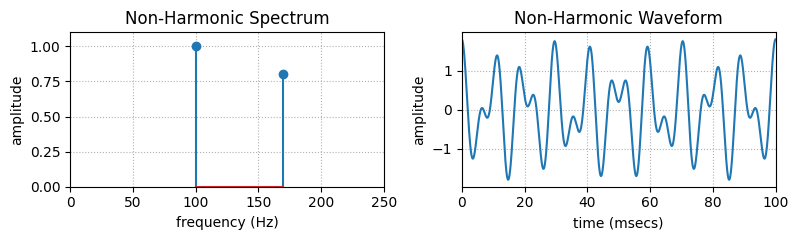

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define time vector: 100 ms at 44.1 kHz
fs = 44100
duration = 0.1  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Non-harmonic frequencies
flist = [100, 170]
alist = [1.0, 0.8]
philist = [0, 0]


# Generate waveform
wave = cosines(t, flist, alist, philist)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 2.5))

# Frequency stem plot
axs[0].stem(flist, alist)
axs[0].set_title("Non-Harmonic Spectrum")
axs[0].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("amplitude")
axs[0].set_xlim(0, 250)
axs[0].set_ylim(0, 1.1)
axs[0].grid(True, linestyle=":")

# Time-domain waveform (first 100 ms)
axs[1].plot(t * 1000, wave)
axs[1].set_title("Non-Harmonic Waveform")
axs[1].set_xlabel("time (msecs)")
axs[1].set_ylabel("amplitude")
axs[1].set_xlim(0, 100)
axs[1].grid(True, linestyle=":")

plt.tight_layout()
plt.show()


## 1b Pitch and Tone

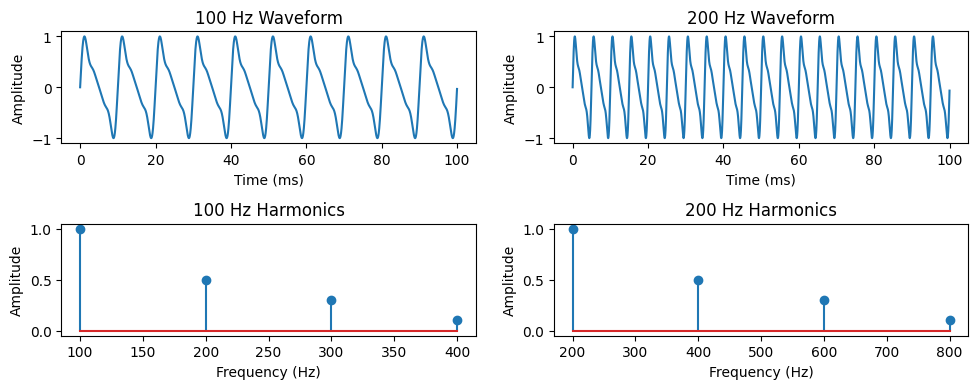

In [6]:

from scipy.io.wavfile import write
import matplotlib.pyplot as plt

fs = 44100  # 44.1 kHz standard audio
duration = 1.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Common harmonic structure (e.g., 4 harmonics)
alist = [1.0, 0.5, 0.3, 0.1]
philist = -np.pi/2  # Use this so wave starts at 0 (avoids pops)

wave1 = harmonic(t, f1=100, alist=alist, philist=philist)
wave2 = harmonic(t, f1=200, alist=alist, philist=philist)


# Normalize to avoid clipping
wave1 = wave1 / np.max(np.abs(wave1))
wave2 = wave2 / np.max(np.abs(wave2))

write("wave_100Hz.wav", fs, (wave1 * 32767).astype(np.int16))
write("wave_200Hz.wav", fs, (wave2 * 32767).astype(np.int16))


# Small segment to visualize clearly
segment = slice(0, int(0.1 * fs))  # First 100ms

fig, axs = plt.subplots(2, 2, figsize=(10, 4))

# Time plots
axs[0, 0].plot(t[segment]*1000, wave1[segment])
axs[0, 0].set_title("100 Hz Waveform")
axs[0, 0].set_xlabel("Time (ms)")
axs[0, 0].set_ylabel("Amplitude")

axs[0, 1].plot(t[segment]*1000, wave2[segment])
axs[0, 1].set_title("200 Hz Waveform")
axs[0, 1].set_xlabel("Time (ms)")
axs[0, 1].set_ylabel("Amplitude")

# Frequency stems
f1s = [(i + 1) * 100 for i in range(len(alist))]
f2s = [(i + 1) * 200 for i in range(len(alist))]

axs[1, 0].stem(f1s, alist)
axs[1, 0].set_title("100 Hz Harmonics")
axs[1, 0].set_xlabel("Frequency (Hz)")
axs[1, 0].set_ylabel("Amplitude")

axs[1, 1].stem(f2s, alist)
axs[1, 1].set_title("200 Hz Harmonics")
axs[1, 1].set_xlabel("Frequency (Hz)")
axs[1, 1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()




The 200 hz sounds higher than 100 hz (predicted), the tone of the 100 hz makes it sound like background noise, while the 200 hz sounds more like like something I should be more alert to.

## 1c Timbre

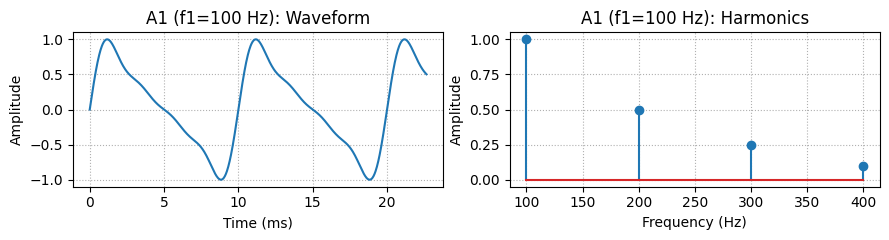

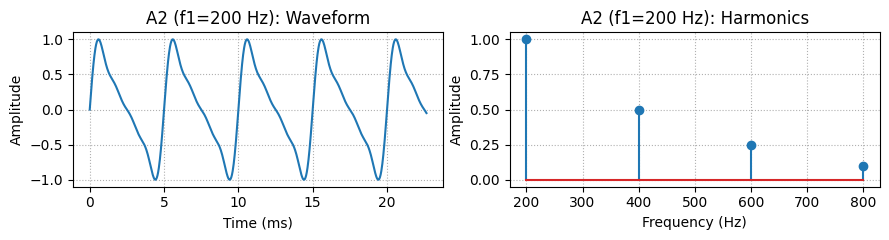

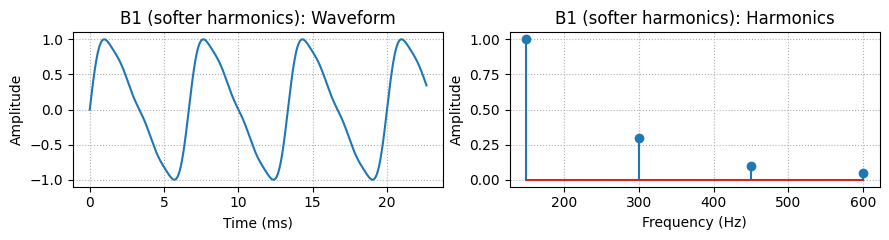

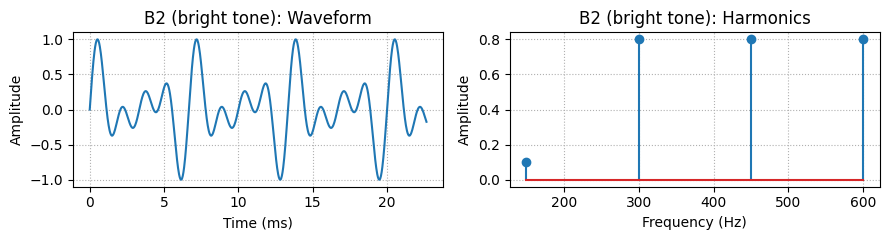

In [ ]:
import matplotlib.pyplot as plt

fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Same harmonic pattern
alist_same = [1.0, 0.5, 0.25, 0.1]
philist = -np.pi/2  # start at 0

# Two different fundamentals
wave_A1 = harmonic(t, f1=100, alist=alist_same, philist=philist)
wave_A2 = harmonic(t, f1=200, alist=alist_same, philist=philist)

# Normalize
wave_A1 /= np.max(np.abs(wave_A1))
wave_A2 /= np.max(np.abs(wave_A2))

# Save to wav
from scipy.io.wavfile import write
write("tone_similar_f1_100_a1.wav", fs, (wave_A1 * 32767).astype(np.int16))
write("tone_similar_f1_200_a2.wav", fs, (wave_A2 * 32767).astype(np.int16))

# Same fundamental
f1 = 150

# Different harmonic patterns
alist_diff1 = [1.0, 0.3, 0.1, 0.05]      # softer upper harmonics
alist_diff2 = [0.1, 0.8, 0.8, 0.8]      # strong higher harmonics

wave_B1 = harmonic(t, f1=f1, alist=alist_diff1, philist=philist)
wave_B2 = harmonic(t, f1=f1, alist=alist_diff2, philist=philist)

wave_B1 /= np.max(np.abs(wave_B1))
wave_B2 /= np.max(np.abs(wave_B2))

write("tone_diff_pattern_1_b1.wav", fs, (wave_B1 * 32767).astype(np.int16))
write("tone_diff_pattern_2_b2.wav", fs, (wave_B2 * 32767).astype(np.int16))


def plot_wave_and_spectrum(t, wave, alist, f1, title_prefix):
    fig, axs = plt.subplots(1, 2, figsize=(9, 2.5))

    # Time-domain waveform (first 100 ms)
    axs[0].plot(t[:1000]*1000, wave[:1000])
    axs[0].set_title(f"{title_prefix}: Waveform")
    axs[0].set_xlabel("Time (ms)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True, linestyle=":")

    # Frequency stem plot
    freqs = [(i + 1) * f1 for i in range(len(alist))]
    axs[1].stem(freqs, alist)
    axs[1].set_title(f"{title_prefix}: Harmonics")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude")
    axs[1].grid(True, linestyle=":")

    plt.tight_layout()
    plt.show()

# Plot A: Similar tone, different fundamentals
plot_wave_and_spectrum(t, wave_A1, alist_same, 100, "A1 (f1=100 Hz)")
plot_wave_and_spectrum(t, wave_A2, alist_same, 200, "A2 (f1=200 Hz)")

# Plot B: Different tone, same fundamental
plot_wave_and_spectrum(t, wave_B1, alist_diff1, f1, "B1 (softer harmonics)")
plot_wave_and_spectrum(t, wave_B2, alist_diff2, f1, "B2 (bright tone)")




A1 and A2 I hear the same tone quality, but in different pitches, B1 and B2 I hear very different "textures" B2 is mellower and B2 is harsher.